<a href="https://colab.research.google.com/github/amandabenjamin/Predicting-Strokes/blob/main/Project_2_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd 

filename = '/content/drive/MyDrive/Coding Dojo/08 Week 8: Gradient Boosting Alg. /healthcare-dataset-stroke-data.csv'
df = pd.read_csv(filename)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Delete unnecessary columns**

Remove ID column (unique identifier) to prohibit the model from over training 

In [5]:
df.drop(columns = 'id', inplace = True)

In [6]:
df.head() #print the first 5 rows of dataset to confirm ID column is missing

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Delete duplicate rows**

In [7]:
df.duplicated().sum() #add the number of duplicated rows 

0

There are no duplicates to drop 

**Identify and addressed missing values**

In [8]:
df.isna().sum() #count the number of missing values per column

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Rule of thumb - dont drop more than 10% of data 

Let's see what percentage the missing 201 comprise of the whole dataset

In [9]:
#find the percentage of missing data in the entire dataset
(201/len(df)*100)

3.9334637964774952

the missing values only comprise ~4% of the dataset so droping them wont effect our dataset terribly AND reduces us from making errors trying to fill these values in 

In [10]:
#display the original length of the dataset
len(df)

5110

In [11]:
df.dropna(inplace = True) #drop missing values 

In [12]:
#display new length of the dataset after missing values have been droped
len(df)

4909

**Identify and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)**

In [15]:
df['gender'].value_counts() #display unique values and their occurance for gender column

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [16]:
df['ever_married'].value_counts() #display unique values and their occurance for marriage column

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [17]:
df['work_type'].value_counts() #display unique values and their occurance for work type column

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [18]:
df['Residence_type'].value_counts() #display unique values and their occurance for residence column

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

In [19]:
df['smoking_status'].value_counts() #display unique values and their occurance for smoking status column

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [20]:
df.describe() #display the statistical outputs for numerical columns 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


lowest age of 0.08 does not make sense for this survey

In [23]:
df['age'].value_counts()

78.00    93
57.00    93
52.00    85
54.00    84
55.00    83
         ..
1.40      3
0.16      3
0.40      2
0.08      2
0.48      2
Name: age, Length: 104, dtype: int64

In [27]:
df[df['age'] < 7].head(100) #display the first 100 values of thoes under age '7'

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
282,Female,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0
291,Male,4.00,0,0,No,children,Rural,79.17,20.0,Unknown,0
363,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
369,Female,4.00,0,0,No,children,Rural,93.25,16.6,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
1600,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1609,Female,1.24,0,0,No,children,Rural,122.04,10.3,Unknown,0
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1632,Female,1.48,0,0,No,children,Rural,55.51,18.5,Unknown,0


these all appear to be kids, so droping these values are most likley not needed

**Produce univariate visuals for the target and all features**

**Identify outliers**

In [21]:
import seaborn as sns 

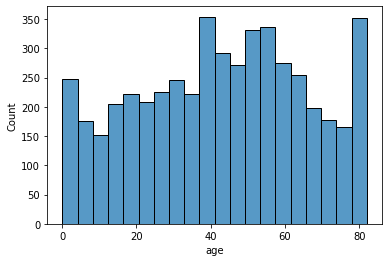

In [28]:
sns.histplot(df, x='age');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


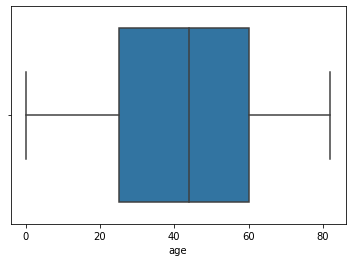

In [36]:
sns.boxplot(df['age']);

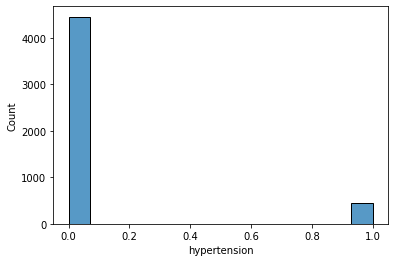

In [32]:
sns.histplot(df, x='hypertension');

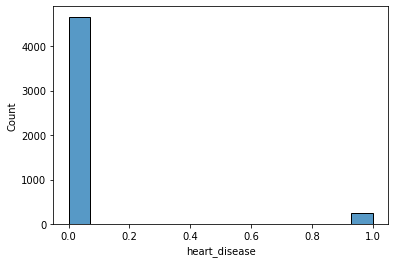

In [33]:
sns.histplot(df, x='heart_disease');

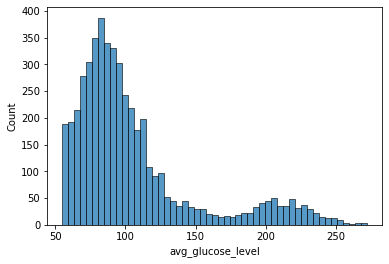

In [34]:
	  sns.histplot(df, x='avg_glucose_level');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


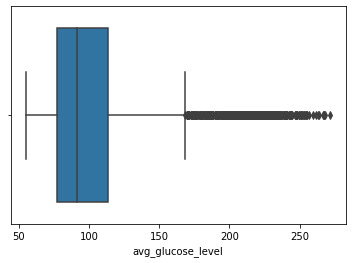

In [37]:
sns.boxplot(df['avg_glucose_level']);

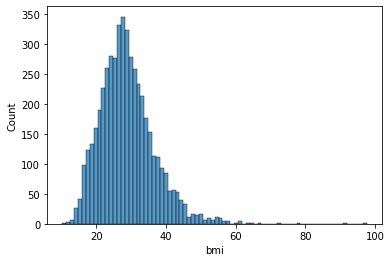

In [38]:
sns.histplot(df,x='bmi');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


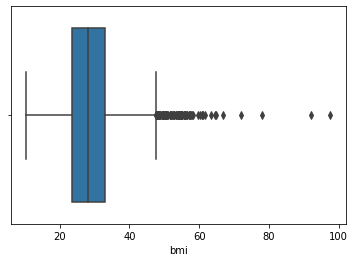

In [40]:
sns.boxplot(df['bmi']);

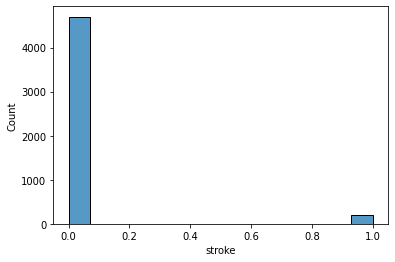

In [41]:
sns.histplot(df,x = 'stroke');

**Produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another**

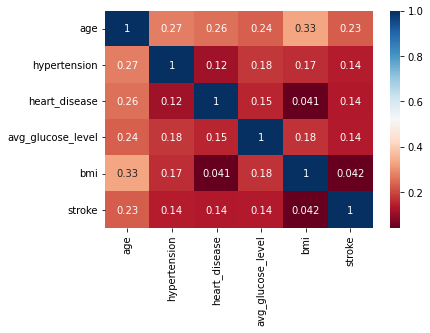

In [22]:
ax = sns.heatmap(df.corr(), cmap = 'RdBu', annot = True)

moderate correlation between 'bmi' and 'age', week correlation between the remaining variables. We do see there is more of a correlation between stroke and age than any other variable with stroke- but the strength of the correlation is realivivly weak still. 